In [1]:
import numpy as np
from Matrica import Matrica
import matplotlib.pyplot as plt
import exsplicitni_postupci
import implicitni_postupci
import ostali_postupci

def plot(ax, t_values, x1_list, x2_list, title):
    ax.set_title(title)
    ax.plot(t_values, x1_list, label='x1')
    ax.plot(t_values, x2_list, label='x2')
    ax.set_xlabel('t')
    ax.legend()

x1_real = lambda t : np.cos(t) + np.sin(t)
x2_real = lambda t : np.cos(t) - np.sin(t)


def err_str(t_values, x1_list, x2_list):
    x1_list_real = x1_real(t_values)  
    x2_list_real = x2_real(t_values)  
    x1_err = np.sum(np.abs(x1_list - x1_list_real))
    x2_err = np.sum(np.abs(x2_list - x2_list_real))
    s = '   x1 err: {:.2f}    x2 err: {:.2f}'.format(x1_err, x2_err)
    return s



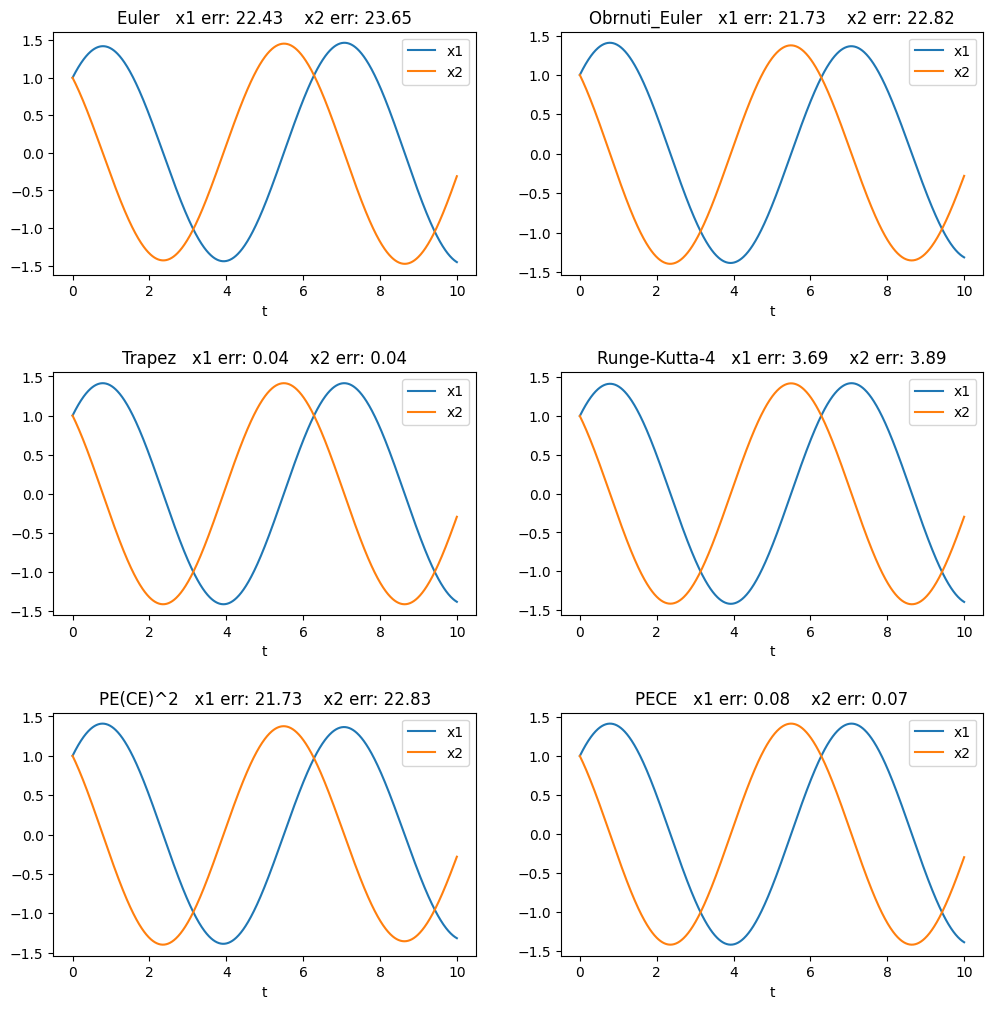

In [2]:


A = Matrica(np.array([[0, 1], [-1, 0]]))
x0 = Matrica(np.array([[1], [1]]))
T = 0.01
tmax = 10

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

Euler = exsplicitni_postupci.Euler(A)
ts, x1, x2 = Euler.postupak(x0)
plot(axs[0, 0], ts, x1, x2, "Euler" + err_str(ts,x1,x2))

Obrnuti_Euler = implicitni_postupci.Obrnuti_Euler(A)
ts, x1, x2 = Obrnuti_Euler.postupak(x0)
plot(axs[0, 1], ts, x1, x2, "Obrnuti_Euler" + err_str(ts,x1,x2))

trapez = implicitni_postupci.Trapez(A)
ts, x1, x2 = trapez.postupak(x0)
plot(axs[1, 0], ts, x1, x2, "Trapez" + err_str(ts,x1,x2))

ts, x1, x2 = ostali_postupci.Runge_Kutta_4(A, x0)
plot(axs[1, 1], ts, x1, x2, "Runge-Kutta-4" + err_str(ts,x1,x2))

ts, x1, x2 = ostali_postupci.pred_korekt(x0, Euler, Obrnuti_Euler, n=2)
plot(axs[2, 0], ts, x1, x2, "PE(CE)^2" + err_str(ts,x1,x2))

ts, x1, x2 = ostali_postupci.pred_korekt(x0, Euler, trapez, n=1)
plot(axs[2, 1], ts, x1, x2, "PECE" + err_str(ts,x1,x2))


plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

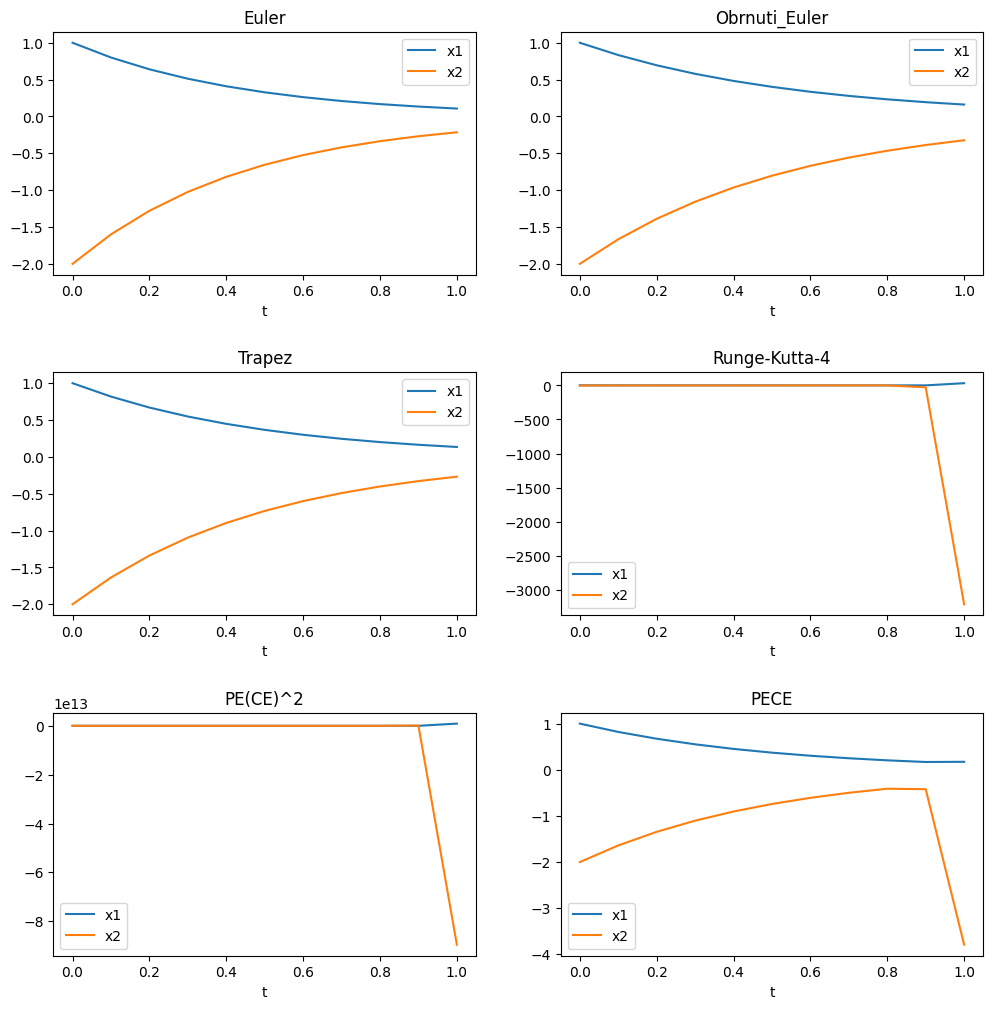

In [3]:

A = Matrica(np.array([[0, 1],
                     [-200, -102]]))

x0 = Matrica(np.array([[1],
                     [-2]]))
T = 0.01
tmax = 1

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

Euler = exsplicitni_postupci.Euler(A,T,tmax)
ts, x1, x2 = Euler.postupak(x0)
plot(axs[0, 0], ts, x1, x2, "Euler" )

Obrnuti_Euler = implicitni_postupci.Obrnuti_Euler(A,T,tmax)
ts, x1, x2 = Obrnuti_Euler.postupak(x0)
plot(axs[0, 1], ts, x1, x2, "Obrnuti_Euler" )

trapez = implicitni_postupci.Trapez(A,T,tmax)
ts, x1, x2 = trapez.postupak(x0)
plot(axs[1, 0], ts, x1, x2, "Trapez" )

ts, x1, x2 = ostali_postupci.Runge_Kutta_4(A, x0,T,tmax)
plot(axs[1, 1], ts, x1, x2, "Runge-Kutta-4" )

ts, x1, x2 = ostali_postupci.pred_korekt(x0, Euler, Obrnuti_Euler, 2,T,tmax)
plot(axs[2, 0], ts, x1, x2, "PE(CE)^2" )

ts, x1, x2 = ostali_postupci.pred_korekt(x0, Euler, trapez, 1,T,tmax)
plot(axs[2, 1], ts, x1, x2, "PECE" )

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

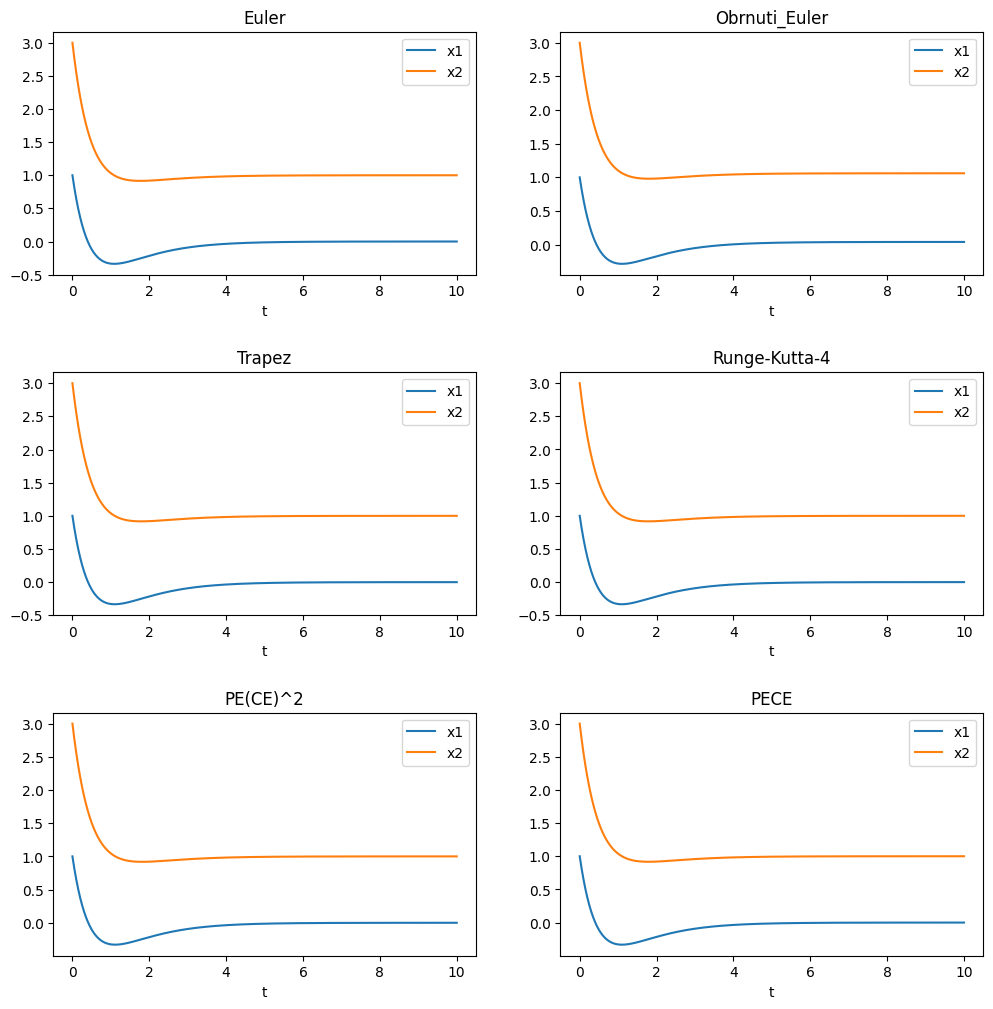

In [4]:
A = Matrica(np.array([[0, -2],
                     [1, -3]]))

x0 = Matrica(np.array([[1],
                     [3]]))

B = Matrica(np.array([[2,0],
                     [0,3]]))
r = lambda t: Matrica(np.array([[1],[1]]))

T = 0.01
tmax = 10

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

Euler = exsplicitni_postupci.Euler(A,T,tmax, B,r)
ts, x1, x2 = Euler.postupak(x0)
plot(axs[0, 0], ts, x1, x2, "Euler" )

Obrnuti_Euler = implicitni_postupci.Obrnuti_Euler(A,T,tmax, B,r)
ts, x1, x2 = Obrnuti_Euler.postupak(x0)
plot(axs[0, 1], ts, x1, x2, "Obrnuti_Euler" )

trapez = implicitni_postupci.Trapez(A,T,tmax, B,r)
ts, x1, x2 = trapez.postupak(x0)
plot(axs[1, 0], ts, x1, x2, "Trapez" )

ts, x1, x2 = ostali_postupci.Runge_Kutta_4(A, x0,T,tmax,  B,r)
plot(axs[1, 1], ts, x1, x2, "Runge-Kutta-4" )

ts, x1, x2 = ostali_postupci.pred_korekt(x0, Euler, Obrnuti_Euler, 2,T,tmax, )
plot(axs[2, 0], ts, x1, x2, "PE(CE)^2" )

ts, x1, x2 = ostali_postupci.pred_korekt(x0, Euler, trapez, 1,T,tmax)
plot(axs[2, 1], ts, x1, x2, "PECE" )

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()



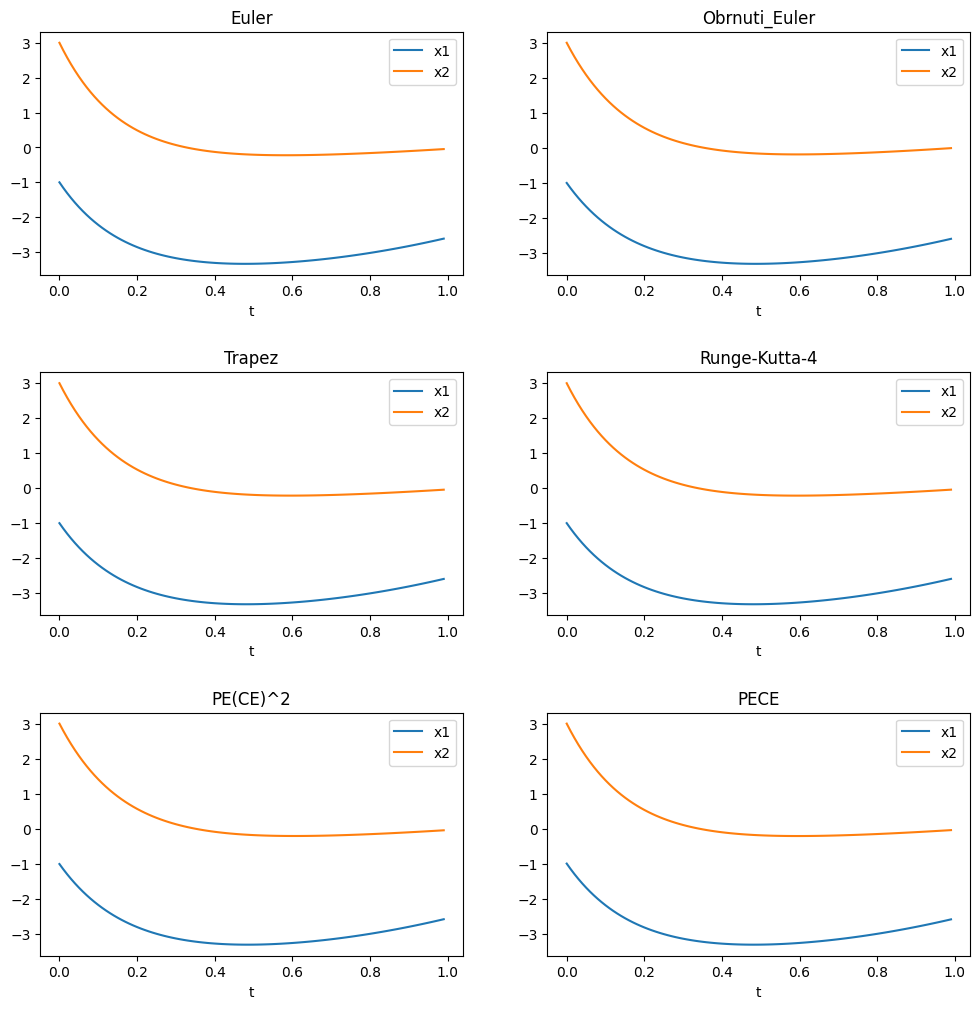

In [5]:
A = Matrica(np.array([[1, -5],
                     [1, -7]]))

x0 = Matrica(np.array([[-1],
                     [3]]))

B = Matrica(np.array([[5,0],
                     [0,3]]))
r = lambda t: Matrica(np.array([[t],[t]]))

T = 0.01
tmax = 1

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

Euler = exsplicitni_postupci.Euler(A,T,tmax, B,r)
ts, x1, x2 = Euler.postupak(x0)
plot(axs[0, 0], ts, x1, x2, "Euler" )

Obrnuti_Euler = implicitni_postupci.Obrnuti_Euler(A,T,tmax, B,r)
ts, x1, x2 = Obrnuti_Euler.postupak(x0)
plot(axs[0, 1], ts, x1, x2, "Obrnuti_Euler" )

trapez = implicitni_postupci.Trapez(A,T,tmax, B,r)
ts, x1, x2 = trapez.postupak(x0)
plot(axs[1, 0], ts, x1, x2, "Trapez" )

ts, x1, x2 = ostali_postupci.Runge_Kutta_4(A, x0,T,tmax,  B,r)
plot(axs[1, 1], ts, x1, x2, "Runge-Kutta-4" )

ts, x1, x2 = ostali_postupci.pred_korekt(x0, Euler, Obrnuti_Euler, 2,T,tmax, )
plot(axs[2, 0], ts, x1, x2, "PE(CE)^2" )

ts, x1, x2 = ostali_postupci.pred_korekt(x0, Euler, trapez, 1,T,tmax)
plot(axs[2, 1], ts, x1, x2, "PECE" )

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()